## test projet marmitton 

In [3]:
from selenium import webdriver
import requests
from selenium.webdriver.chrome.options import Options as ChromeOptions

In [4]:
# Import necessary packages
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import requests

url = "https://www.marmiton.org/"
response = requests.get(url)

# Affiche les informations de la réponse
print(response.status_code)
print(type(response.content))
print(type(response.text))
# print(response.text) # Peut être très long, décommenter si nécessaire

# Écriture dans le fichier avec un context manager (plus sûr)
with open("marmiton.html", "w", encoding='utf-8') as create_file:
    create_file.write(response.text)

# Configuration de Chrome pour éviter les erreurs de session
chrome_options = Options()
chrome_options.add_argument("--disable-search-engine-choice-screen")

try:
    driver = webdriver.Chrome(options=chrome_options)
    driver.get("https://www.marmiton.org/")
    print("Navigateur lancé avec succès.")
except Exception as e:
    print(f"Erreur lors du lancement de Chrome : {e}")

200
<class 'bytes'>
<class 'str'>
Erreur lors du lancement de Chrome : Message: session not created: Chrome instance exited. Examine ChromeDriver verbose log to determine the cause.; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#sessionnotcreatedexception
Stacktrace:
#0 0x57519d95ad0a <unknown>
#1 0x57519d36a682 <unknown>
#2 0x57519d3a823b <unknown>
#3 0x57519d3a2f09 <unknown>
#4 0x57519d3f48de <unknown>
#5 0x57519d3f3fcc <unknown>
#6 0x57519d3b188f <unknown>
#7 0x57519d3b2651 <unknown>
#8 0x57519d91f159 <unknown>
#9 0x57519d922061 <unknown>
#10 0x57519d90b919 <unknown>
#11 0x57519d922c2e <unknown>
#12 0x57519d8f1c90 <unknown>
#13 0x57519d947358 <unknown>
#14 0x57519d947528 <unknown>
#15 0x57519d959353 <unknown>
#16 0x70d7ed144aa4 <unknown>
#17 0x70d7ed1d1c6c <unknown>



In [3]:
from bs4 import BeautifulSoup

# Lecture du fichier marmiton.html généré précédemment
try:
    with open("marmiton.html", "r", encoding="utf-8") as f:
        html_content = f.read()
        html_content = open("marmiton.html", "r", encoding="utf-8").read()
        open("marmiton.html", "r", encoding="utf-8").read()
    
    soup = BeautifulSoup(html_content, 'html.parser')
    
    def extraire_titres(soup):
        # TODO: Implémenter l'extraction des titres de recettes
        pass

    def extraire_ingredients(soup):
        # TODO: Implémenter l'extraction des listes d'ingrédients
        pass

    def extraire_images(soup):
        # TODO: Implémenter la récupération des URLs des images
        pass

    # Exécution des fonctions de traitement
    extraire_titres(soup)
    extraire_ingredients(soup)
    extraire_images(soup)
    print("Fichier chargé et prêt pour l'analyse.")

except FileNotFoundError:
    print("Le fichier marmiton.html n'a pas été trouvé. Assurez-vous d'avoir exécuté la cellule précédente.")

Fichier chargé et prêt pour l'analyse.


Il faut chercher dans la page ce type de contenu pour avoir accès aux notes /5 de la recette. Il s'agit ici de "brioche_facile" 

url:  view-source:https://www.marmiton.org/recettes/recette_brioche-facile_27661.aspx


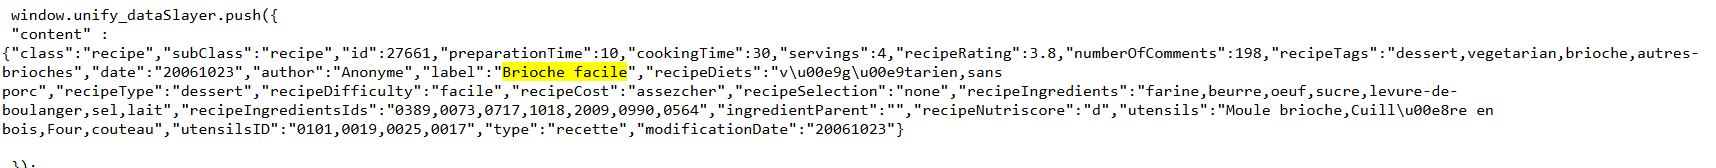

In [ ]:
# import os

# file_path = os.path.abspath("marmiton.html")
# for 


In [19]:
import csv
import json

def extraire_liens_page(soup):
    """
    Fonction pour extraire tous les liens .aspx et https de la page.
    Retourne une liste de dictionnaires [{'titre_lien': ..., 'lien': ...}].
    Filtre les doublons d'URL.
    """
    liens_uniques = []
    urls_vues = set()

    # Utiliser soup.find_all('a') pour récupérer tous les liens
    liens = soup.find_all('a')
    
    # Boucle sur chaque lien
    for lien_tag in liens:
        # 1. Récupérer l'attribut 'href' et le texte du lien (titre).
        href = lien_tag.get('href')
        titre = lien_tag.get_text(strip=True)
        
        if href:
            # 2. Filtrer : Garder si 'href' contient ".aspx" OU commence par "https" (tous domaines).
            if ".aspx" in href or href.startswith("https"):
                
                # 3. Dédoublonnage
                if href not in urls_vues:
                    urls_vues.add(href)
                    liens_uniques.append({
                        'titre_lien': titre if titre else "Sans titre", # Gestion des titres vides
                        'lien': href
                    })
    
    return liens_uniques

def sauvegarder_donnees(donnees, nom_fichier, format_fichier='csv'):
    """
    Fonction pour sauvegarder les données extraites dans un fichier CSV ou JSON.
    Colonnes attendues : titres_lien, lien
    """
    if format_fichier == 'csv':
        colonnes = ['titre_lien', 'lien']
        try:
            with open(nom_fichier, 'w', encoding='utf-8', newline='') as f:
                writer = csv.DictWriter(f, fieldnames=colonnes)
                writer.writeheader()
                writer.writerows(donnees)
            print(f"Données sauvegardées avec succès dans {nom_fichier}")
        except Exception as e:
            print(f"Erreur lors de la sauvegarde CSV: {e}")
            
    elif format_fichier == 'json':
        try:
            with open(nom_fichier, 'w', encoding='utf-8') as f:
                json.dump(donnees, f, indent=4, ensure_ascii=False)
            print(f"Données sauvegardées avec succès dans {nom_fichier}")
        except Exception as e:
            print(f"Erreur lors de la sauvegarde JSON: {e}")
    else:
        print("Format non supporté.")

# Utilisation des fonctions
if 'soup' in globals() or 'soup' in locals():
    liens_extraits = extraire_liens_page(soup)
    print(f"{len(liens_extraits)} liens uniques trouvés.")
    
    if len(liens_extraits) > 0:
        print(f"Exemple de lien extrait : {liens_extraits[0]}")
        sauvegarder_donnees(liens_extraits, "liens_marmiton.csv", format_fichier='csv')
        sauvegarder_donnees(liens_extraits, "liens_marmiton.json", format_fichier='json')
else:
    print("Erreur : La variable 'soup' n'est pas définie. Veuillez exécuter la cellule précédente pour charger la page HTML.")

205 liens uniques trouvés.
Exemple de lien extrait : {'titre_lien': 'Sans titre', 'lien': 'https://www.marmiton.org/'}
Données sauvegardées avec succès dans liens_marmiton.csv
Données sauvegardées avec succès dans liens_marmiton.json


In [1]:
import time
import random
import requests
import re
from bs4 import BeautifulSoup
import json
import concurrent.futures # Nécessaire pour le parallélisme

# --- PHASE 1 : Récupération récursive (Crawling) ---
# Note : On garde le crawling séquentiel pour ne pas se faire bannir trop vite par le site
# car bombarder de requêtes différentes pages de navigation est suspect.

def crawling_recursif_categories(url_depart, urls_visitees, urls_recettes, profondeur_max=500, profondeur_actuelle=0, max_breadth=300):
    
    if profondeur_actuelle > profondeur_max: return
    if url_depart in urls_visitees: return

    urls_visitees.add(url_depart)
    indent = "  " * profondeur_actuelle
    print(f"{indent}📂 Niv {profondeur_actuelle}: {url_depart}")

    try:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
        response = requests.get(url_depart, headers=headers, timeout=10)
        
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            liens_page = soup.find_all('a')
            nb_recettes_trouvees = 0
            nouvelles_categories = []
            
            # --- CORRECTION CATEGORIES DANS LE CRAWLING ---
            # Pour classer correctement, il faut identifier explicitement les urls de catégories "Entrée", "Plat", "Dessert"
            # Marmiton a des urls du type /recettes/index/categorie/entree, /recettes/index/categorie/plat-principal, etc.
            
            for link in liens_page:
                href = link.get('href')
                if not href: continue
                
                if href.startswith('/'): full_url = "https://www.marmiton.org" + href
                elif href.startswith('http'): full_url = href
                else: continue
                    
                full_url = full_url.split('#')[0]

                if '/recettes/recette_' in full_url:
                    if full_url not in urls_recettes:
                        urls_recettes.add(full_url)
                        nb_recettes_trouvees += 1
                
                # Correction : on explore spécifiquement les index de catégories pour trouver plus de variété
                elif '/recettes/index/categorie/' in full_url:
                    if full_url not in urls_visitees and full_url not in nouvelles_categories:
                        nouvelles_categories.append(full_url)
            
            print(f"{indent}   -> +{nb_recettes_trouvees} recettes (Total: {len(urls_recettes)})")
            
            # Appel récursif limité
            for sous_cat_url in nouvelles_categories[:max_breadth]:
                crawling_recursif_categories(sous_cat_url, urls_visitees, urls_recettes, profondeur_max, profondeur_actuelle + 1, max_breadth)

    except Exception as e:
        print(f"Erreur sur {url_depart} : {e}")

# --- PHASE 2 : Extraction des détails (Optimisée Multi-threading) ---

def extraire_details_recette(url_recette):
    details = { 
        'url': url_recette, 
        'titre': None, 
        'note': None, 
        'categorie_principale': None,
        'ingredients': [],
        'preparation': [],
        'image_url': None
    }
    try:
        # Pause légère aléatoire pour varier les timings même en parallèle
        time.sleep(random.uniform(0.1, 0.5)) 
        
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko)'}
        response = requests.get(url_recette, headers=headers, timeout=10)
        
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            
            # 1. Titre
            h1 = soup.find('h1')
            if h1: details['titre'] = h1.get_text(strip=True)
            
            # 2. Note
            # La note est souvent dans un <span class="recipe-header__rating-text"> ou class similaire
            # On cherche un pattern type "x/5" ou nombre simple dans les blocks de notation
            note_elem = soup.find(string=re.compile(r'\d(\.\d)?/5'))
            if note_elem: 
                details['note'] = note_elem.strip()
            
            # 3. Categorisation "Intelligente"
            # On essaie de déduire la catégorie depuis le fil d'ariane (breadcrumb) ou les tags
            # Idéalement : "Entrée", "Plat principal", "Dessert"
            breadcrumb = soup.select(".mrt-breadcrumb__link") # Sélecteur à adapter selon le site actuel
            found_category = "Autre"
            
            # Recherche de mots clés dans le breadcrumb ou les tags
            all_text_content = soup.get_text().lower()
            if "entrée" in all_text_content or "aperitif" in all_text_content:
                found_category = "Entrée"
            elif "plat principal" in all_text_content or "viande" in all_text_content or "poisson" in all_text_content:
                found_category = "Plat principal"
            elif "dessert" in all_text_content or "gâteau" in all_text_content or "sucré" in all_text_content:
                found_category = "Dessert"
            
            # Essayer de trouver la catégorie spécifique dans le header ou les tags
            cat_tag = soup.find('a', href=lambda x: x and '/recettes/index/categorie/' in x)
            if cat_tag:
                cat_text = cat_tag.get_text(strip=True).lower()
                if "entree" in cat_text or "entrée" in cat_text: found_category = "Entrée"
                if "plat" in cat_text: found_category = "Plat principal"
                if "dessert" in cat_text: found_category = "Dessert"

            details['categorie_principale'] = found_category

            # 4. Ingrédients
            # Classes souvent utilisées par Marmiton (à ajuster si le site change)
            # .mrt-ingredients-list ... .card-ingredient
            ingredients_elements = soup.select(".mrt-ingredients-list__item, .card-ingredient-title, .ingredient-name") 
            # Si selecteur spécifique échoue, on tente une approche plus générique (div contenant 'ingrédients')
            if not ingredients_elements:
                 ingredients_elements = soup.find_all("span", {"class": "ingredient-name"})
            
            details['ingredients'] = [ing.get_text(strip=True) for ing in ingredients_elements]

            # 5. Préparation (Étapes)
            # Classes souvent utilisées : .recipe-step-list__container, .recipe-step-list
            steps_elements = soup.select(".recipe-step-list__container p, .recipe-step-list__description, .step-text")
            details['preparation'] = [step.get_text(strip=True) for step in steps_elements]
            
            # 6. Image
            # Souvent dans une balise img avec class='recipe-header__media-image' ou premier img du main
            img_elem = soup.select_one("img#af-diapo-visuel, .recipe-header__media-image, .main-picture") 
            if img_elem:
                details['image_url'] = img_elem.get('src') or img_elem.get('data-src')

            return details # Succès
    except Exception as e: 
        # print(f"Erreur extraction details {url_recette}: {e}")
        pass
    
    return details # Retourne au moins l'URL en cas d'échec


# --- EXECUTION ---

# On peut cibler direct des index de catégories pour être sûr d'avoir du mix
urls_depart = [
    "https://www.marmiton.org/recettes/index/categorie/entree",
    "https://www.marmiton.org/recettes/index/categorie/plat-principal",
    "https://www.marmiton.org/recettes/index/categorie/dessert"
]

urls_visitees_global = set()
urls_recettes_global = set()

print(f"🚀 1. Lancement du CRAWLER (Multi-Point de départ)...")

# Crawling depuis chaque catégorie principale pour équilibrer
for start_url in urls_depart:
    crawling_recursif_categories(
        url_depart=start_url, 
        urls_visitees=urls_visitees_global, 
        urls_recettes=urls_recettes_global, 
        profondeur_max=500,  # Profondeur réduite pour démo rapide mais efficace
        max_breadth=300
    )

list_urls = list(urls_recettes_global)
print(f"\n✅ Crawling terminé. {len(list_urls)} recettes trouvées.")


print(f"\n🚀 2. Lancement du SCRAPING (Parallélisé - 10 workers)...")
dataset_final = []

# Utilisation d'un ThreadPoolExecutor pour paralléliser les requêtes
# max_workers=10 signifie 10 pages chargées simultanément
# Attention : trop de workers = risque ban IP temporaire
with concurrent.futures.ThreadPoolExecutor(max_workers=100) as executor:
    # On soumet toutes les tâches
    futures = {executor.submit(extraire_details_recette, url): url for url in list_urls}
    
    count = 0
    total = len(list_urls)
    
    # On récupère les résultats au fur et à mesure
    for future in concurrent.futures.as_completed(futures):
        data = future.result()
        # On filtre les résultats vides ou sans titre
        if data.get('titre'):
            dataset_final.append(data)
        count += 1
        if count % 10 == 0:
            print(f"   Progression: {count}/{total} recettes...", end='\r')

# Sauvegarde
with open('dataset_marmiton_final.json', 'w', encoding='utf-8') as f:
    json.dump(dataset_final, f, indent=4, ensure_ascii=False)

print(f"\n\n💾 Tout est fini ! {len(dataset_final)} recettes valides sauvegardées dans dataset_marmiton_final.json")

🚀 1. Lancement du CRAWLER (Multi-Point de départ)...
📂 Niv 0: https://www.marmiton.org/recettes/index/categorie/entree
   -> +48 recettes (Total: 48)
  📂 Niv 1: https://www.marmiton.org/recettes/index/categorie/entree/
     -> +0 recettes (Total: 48)
    📂 Niv 2: https://www.marmiton.org/recettes/index/categorie/plat-principal/
       -> +42 recettes (Total: 90)
      📂 Niv 3: https://www.marmiton.org/recettes/index/categorie/dessert/
         -> +42 recettes (Total: 132)
        📂 Niv 4: https://www.marmiton.org/recettes/index/categorie/boissons/
           -> +42 recettes (Total: 174)
          📂 Niv 5: https://www.marmiton.org/recettes/index/categorie/boissons-chaudes/
             -> +26 recettes (Total: 200)
            📂 Niv 6: https://www.marmiton.org/recettes/index/categorie/vin-chaud/
               -> +8 recettes (Total: 208)
            📂 Niv 6: https://www.marmiton.org/recettes/index/categorie/chocolat-chaud/
               -> +32 recettes (Total: 240)
              📂 Niv 7

: 